<a href="https://colab.research.google.com/github/xiajenny/struct2depth2unity/blob/master/depth_mapping_to_point_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [4]:
import numpy as np
!pip install git+https://github.com/daavoo/pyntcloud
from pyntcloud import PyntCloud
!pip install open3d-python
from open3d import *

  Cloning https://github.com/daavoo/pyntcloud to /tmp/pip-req-build-zq3k6qlt
  Stored in directory: /tmp/pip-ephem-wheel-cache-gafz6fqt/wheels/be/37/76/afc097c015aa7cdb2ccfc317e1ea8684c387d6b48984dd1ded
Successfully built pyntcloud
    100% |████████████████████████████████| 3.3MB 8.1MB/s 


In [0]:
import pandas as pd

In [6]:
data = np.load('/content/gdrive/My Drive/struct2depth2unity/inference/image_00/data/0000000071.npy')
data

array([[[0.80887544],
        [0.80425215],
        [0.80283856],
        ...,
        [2.334625  ],
        [2.3736236 ],
        [2.3095474 ]],

       [[0.8135801 ],
        [0.8086897 ],
        [0.8238515 ],
        ...,
        [2.3498483 ],
        [2.3824599 ],
        [2.349738  ]],

       [[0.80220056],
        [0.8094952 ],
        [0.81642216],
        ...,
        [2.35846   ],
        [2.372224  ],
        [2.342597  ]],

       ...,

       [[0.26966426],
        [0.26844442],
        [0.26958007],
        ...,
        [0.28334078],
        [0.28182846],
        [0.28131223]],

       [[0.2666884 ],
        [0.26518446],
        [0.26316768],
        ...,
        [0.27995893],
        [0.2798696 ],
        [0.28076026]],

       [[0.2668899 ],
        [0.26537475],
        [0.26376337],
        ...,
        [0.27854723],
        [0.2775719 ],
        [0.276902  ]]], dtype=float32)

In [7]:
print(np.amin(data), np.amax(data))
print(data.shape)

0.25871208 9.691163
(128, 416, 1)


In [8]:
ndata = data * 10
print(np.amin(ndata), np.amax(ndata))


2.5871208 96.91163


In [9]:
data[0][1][0]

0.80425215

In [14]:
#raw image size is ‪1,242 x 375‬
#cropped images are 416 x 128

focalLength = 645.24/3 #focal length in pixels https://github.com/pangfumin/libviso2/blob/master/src/demo.cpp~
centerX = 635.96/3
centerY = 194.13/3
scalingFactor = 0.5707

def generate_pointcloud(depth_map):
  shape = depth_map.shape
  rows = shape[0]
  cols = shape[1]
  
  points = np.zeros((rows*cols, 3), np.float32)
  
  i= 0
  
  for u in range(0, cols):
    for v in range(0, rows):
      Z = depth_map[v][u][0] / scalingFactor
      X = (v - centerX) * Z / focalLength
      Y = (centerY - u) * Z / focalLength
      if Z != 0:
        points[i, 0] = X
        points[i, 1] = Y
        points[i, 2] = Z
      else: 
        points[i, 0] = np.nan
        points[i, 1] = np.nan
        points[i, 2] = np.nan
      i = i+1
      
  return points
      
point_cloud = generate_pointcloud(data)
print(point_cloud)

np.save("/content/gdrive/My Drive/struct2depth2unity/test-point-cloud", point_cloud)
np.savez("/content/gdrive/My Drive/struct2depth2unity/test-point-cloud", point_cloud)

[[-1.3969547   0.42642745  1.4173391 ]
 [-1.3984516   0.42890766  1.4255828 ]
 [-1.3723559   0.42290854  1.4056432 ]
 ...
 [-0.19935788 -0.802802    0.49292487]
 [-0.19667938 -0.8012268   0.4919577 ]
 [-0.19172068 -0.79021615  0.4851971 ]]


In [0]:

def generate_pointcloud2(depth_map):
  shape = depth_map.shape
  rows = shape[0]
  cols = shape[1]
  
  points = np.zeros((rows*cols, 3), np.float32)
  
  i= 0
  
  for u in range(0, cols):
    for v in range(0, rows):
      Z = depth_map[v][u][0] *75.0
      X = u
      Y = v
      if Z != 0:
        points[i, 0] = Z
        points[i, 1] = X
        points[i, 2] = Y
      else: 
        points[i, 0] = np.nan
        points[i, 1] = np.nan
        points[i, 2] = np.nan
      i = i+1
      
  return points
      
point_cloud2 = generate_pointcloud2(data)

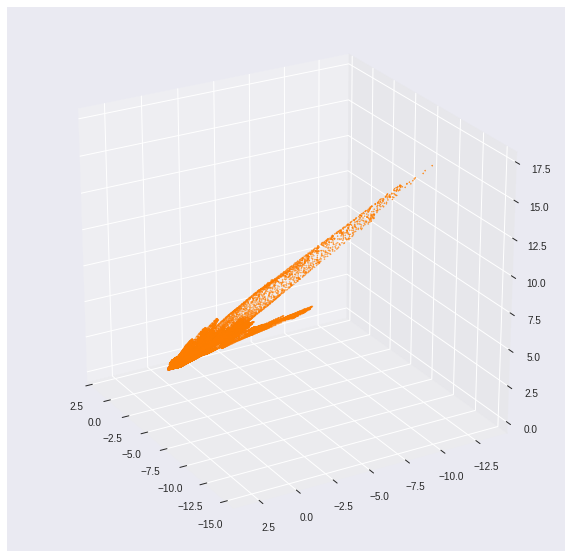

In [15]:
#test_pyntcloud = PyntCloud.from_file("/content/gdrive/My Drive/struct2depth2unity/test-point-cloud.npz")

import matplotlib

dataset = pd.DataFrame({'x':point_cloud[:,0], 'y':point_cloud[:,1], 'z':point_cloud[:,2]})
#print(dataset)

test_pyntcloud = PyntCloud(dataset)

test_pyntcloud.points.describe()

test_pyntcloud.plot(backend="matplotlib", elev=25, azim=150, initial_point_size=1)

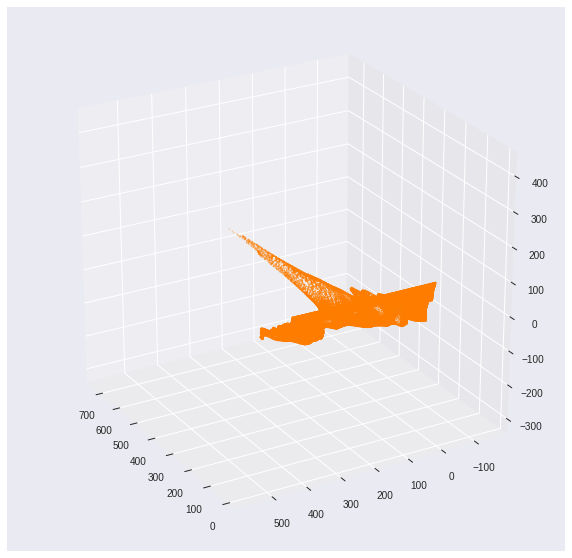

In [22]:
dataset = pd.DataFrame({'x':point_cloud2[:,0], 'y':point_cloud2[:,1], 'z':point_cloud2[:,2]})
#print(dataset)

test_pyntcloud = PyntCloud(dataset)

test_pyntcloud.points.describe()

test_pyntcloud.plot(backend="matplotlib", elev=25, azim=150, initial_point_size=1)

In [0]:
test_pyntcloud.to_file("/content/gdrive/My Drive/struct2depth2unity/pyntcloud_test.obj")